In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-07-17 13:14:59.445031: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-17 13:14:59.449408: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-17 13:14:59.461573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752750899.481101    8059 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752750899.486642    8059 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752750899.501884    8059 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
#define path way

dataset = 'cv/model/keypoint_classifier/keypoint.csv'
model_save_path = 'cv/model/keypoint_classifier/keypoint_classifier.h5'
tflite_save_path = 'cv/model/keypoint_classifier/keypoint_classifier.tflite'

In [3]:
#number of classes
NUM_CLASSES = 8

In [4]:
# Load dataset
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [6]:
#build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2025-07-17 13:15:02.776578: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [9]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 8s 822ms/step - accuracy: 0.1484 - loss: 2.0739
Epoch 1: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.1449 - loss: 2.1001 - val_accuracy: 0.1279 - val_loss: 2.0761
Epoch 2/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1484 - loss: 2.1126
Epoch 2: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1351 - loss: 2.0992 - val_accuracy: 0.0884 - val_loss: 2.0685
Epoch 3/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0859 - loss: 2.0946
Epoch 3: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1262 - loss: 2.0873 - val_accuracy: 0.0674 - val_loss: 2.0653
Epoch 4/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1172 - loss: 2.1018
Epoch 4: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1283 - loss: 2.0816 - val_accuracy: 0.0744 - val_loss: 2.0631
Epoch 5/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1328 - loss: 2.0576
Epoch 5: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1325 - loss: 2.0620 - val_accuracy: 0.0674 - val_loss: 2.0589
Epoch 6/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1562 - loss: 2.0660
Epoch 6: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1484 - loss: 2.0656 - val_accuracy: 0.0767 - val_loss: 2.0549
Epoch 7/1000
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1400 - loss: 2.0671 
Epoch 7: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1407 - loss: 2.0666 - val_accuracy: 0.0512 - val_loss: 2.0503
Epoch 8/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1641 - loss: 2.0645
Epoch 8: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1442 - loss: 2.0623 - val_accuracy: 0.0674 - val_loss: 2.0463
Epoch 9/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1016 - loss: 2.0622
Epoch 9: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1295 - loss: 2.0592 - val_accuracy: 0.0349 - val_loss: 2.0422
Epoch 10/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1641 - loss: 2.0497
Epoch 10: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1246 - loss: 2.0537 - val_accuracy: 0.0395 - val_loss: 2.0355
Epoch 11/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1250 - loss: 2.0492
Epoch 11: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1301 - loss: 2.0542 - val_accuracy: 0.0953 - val_loss: 2.0317
Epoch 12/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1406 - loss: 2.0984
Epoch 12: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1547 - loss: 2.0628 - val_accuracy: 0.1140 - val_loss: 2.0281
Epoch 13/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.1562 - loss: 2.0385
Epoch 13: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1346 - loss: 2.0513 - val_accuracy: 0.1535 - val_loss: 2.0241
Epoch 14/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1484 - loss: 2.0273
Epoch 14: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1449 - loss: 2.0418 - val_accuracy: 0.1233 - val_loss: 2.0191
Epoch 15/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1406 - loss: 2.0424
Epoch 15: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1444 - loss: 2.0329 - val_accuracy: 0.0419 - val_loss: 2.0113
Epoch 16/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1484 - loss: 2.0271
Epoch 16: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1479 - loss: 2.0312 - val_accuracy: 0.0419 - val_loss: 2.0056
Epoch 17/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1328 - loss: 1.9979
Epoch 17: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1424 - loss: 2.0253 - val_accuracy: 0.0837 - val_loss: 1.9998
Epoch 18/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.1016 - loss: 2.0451
Epoch 18: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1406 - loss: 2.0431 - val_accuracy: 0.1256 - val_loss: 1.9946
Epoch 19/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1250 - loss: 2.0276
Epoch 19: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1432 - loss: 2.0297 - val_accuracy: 0.1977 - val_loss: 1.9906
Epoch 20/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1719 - loss: 2.0109
Epoch 20: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1601 - loss: 2.0195 - val_accuracy: 0.2256 - val_loss: 1.9870
Epoch 21/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1875 - loss: 1.9730
Epoch 21: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1645 - loss: 2.0011 - val_accuracy: 0.2581 - val_loss: 1.9800
Epoch 22/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.1562 - loss: 2.0071
Epoch 22: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1655 - loss: 2.0145 - val_accuracy: 0.3326 - val_loss: 1.9739
Epoch 23/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.1641 - loss: 1.9977
Epoch 23: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1654 - loss: 2.0032 - val_accuracy: 0.2860 - val_loss: 1.9639
Epoch 24/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2188 - loss: 1.9734
Epoch 24: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2006 - loss: 1.9906 - val_accuracy: 0.2674 - val_loss: 1.9515
Epoch 25/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1953 - loss: 2.0219
Epoch 25: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1929 - loss: 1.9924 - val_accuracy: 0.3023 - val_loss: 1.9339
Epoch 26/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.1406 - loss: 2.0284
Epoch 26: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1671 - loss: 1.9958 - val_accuracy: 0.3791 - val_loss: 1.9203
Epoch 27/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2109 - loss: 1.9668
Epoch 27: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2111 - loss: 1.9649 - val_accuracy: 0.3674 - val_loss: 1.9039
Epoch 28/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.1797 - loss: 1.9464
Epoch 28: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2090 - loss: 1.9625 - val_accuracy: 0.3558 - val_loss: 1.8888
Epoch 29/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1797 - loss: 1.9672
Epoch 29: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2280 - loss: 1.9461 - val_accuracy: 0.3767 - val_loss: 1.8699
Epoch 30/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2891 - loss: 1.9279
Epoch 30: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2689 - loss: 1.9243 - val_accuracy: 0.3767 - val_loss: 1.8461
Epoch 31/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2266 - loss: 1.9242
Epoch 31: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2557 - loss: 1.9189 - val_accuracy: 0.4256 - val_loss: 1.8215
Epoch 32/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2812 - loss: 1.9469
Epoch 32: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2746 - loss: 1.9215 - val_accuracy: 0.4535 - val_loss: 1.7967
Epoch 33/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3438 - loss: 1.8487
Epoch 33: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3017 - loss: 1.8505 - val_accuracy: 0.4512 - val_loss: 1.7591
Epoch 34/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2891 - loss: 1.8759
Epoch 34: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2885 - loss: 1.8706 - val_accuracy: 0.4744 - val_loss: 1.7205
Epoch 35/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3281 - loss: 1.7955
Epoch 35: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3170 - loss: 1.8338 - val_accuracy: 0.5209 - val_loss: 1.6806
Epoch 36/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3359 - loss: 1.7866
Epoch 36: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3310 - loss: 1.7978 - val_accuracy: 0.5442 - val_loss: 1.6425
Epoch 37/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3359 - loss: 1.8302
Epoch 37: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3377 - loss: 1.7985 - val_accuracy: 0.5535 - val_loss: 1.5991
Epoch 38/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3438 - loss: 1.7784
Epoch 38: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3432 - loss: 1.7492 - val_accuracy: 0.5581 - val_loss: 1.5629
Epoch 39/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3828 - loss: 1.7485
Epoch 39: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3658 - loss: 1.7451 - val_accuracy: 0.5488 - val_loss: 1.5505
Epoch 40/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2891 - loss: 1.8128
Epoch 40: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3364 - loss: 1.7458 - val_accuracy: 0.5419 - val_loss: 1.5257
Epoch 41/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3203 - loss: 1.7650
Epoch 41: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3644 - loss: 1.7151 - val_accuracy: 0.5512 - val_loss: 1.4968
Epoch 42/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4062 - loss: 1.6281
Epoch 42: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3923 - loss: 1.6657 - val_accuracy: 0.6047 - val_loss: 1.4630
Epoch 43/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4219 - loss: 1.5854
Epoch 43: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3909 - loss: 1.6455 - val_accuracy: 0.6000 - val_loss: 1.4376
Epoch 44/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.3359 - loss: 1.7064
Epoch 44: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3631 - loss: 1.6874 - val_accuracy: 0.5930 - val_loss: 1.4179
Epoch 45/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4062 - loss: 1.5897
Epoch 45: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3740 - loss: 1.6281 - val_accuracy: 0.5930 - val_loss: 1.3942
Epoch 46/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3672 - loss: 1.6126
Epoch 46: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3861 - loss: 1.6111 - val_accuracy: 0.5860 - val_loss: 1.3605
Epoch 47/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4219 - loss: 1.5465
Epoch 47: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4049 - loss: 1.5934 - val_accuracy: 0.6023 - val_loss: 1.3408
Epoch 48/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4062 - loss: 1.6228
Epoch 48: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4114 - loss: 1.5861 - val_accuracy: 0.6023 - val_loss: 1.3266
Epoch 49/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4062 - loss: 1.5856
Epoch 49: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3734 - loss: 1.6053 - val_accuracy: 0.6163 - val_loss: 1.3147
Epoch 50/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3438 - loss: 1.6237
Epoch 50: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3682 - loss: 1.5766 - val_accuracy: 0.6326 - val_loss: 1.2895
Epoch 51/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3750 - loss: 1.5949
Epoch 51: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3917 - loss: 1.5697 - val_accuracy: 0.6256 - val_loss: 1.2671
Epoch 52/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3672 - loss: 1.6081
Epoch 52: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4014 - loss: 1.5522 - val_accuracy: 0.6163 - val_loss: 1.2477
Epoch 53/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3672 - loss: 1.6120
Epoch 53: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3917 - loss: 1.5458 - val_accuracy: 0.6116 - val_loss: 1.2302
Epoch 54/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4219 - loss: 1.5579
Epoch 54: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4351 - loss: 1.4978 - val_accuracy: 0.6140 - val_loss: 1.2204
Epoch 55/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3594 - loss: 1.6081
Epoch 55: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3728 - loss: 1.5692 - val_accuracy: 0.6349 - val_loss: 1.2149
Epoch 56/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3594 - loss: 1.5570
Epoch 56: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4055 - loss: 1.5264 - val_accuracy: 0.6279 - val_loss: 1.2070
Epoch 57/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4688 - loss: 1.4391
Epoch 57: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4201 - loss: 1.4933 - val_accuracy: 0.6070 - val_loss: 1.1971
Epoch 58/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4062 - loss: 1.4204
Epoch 58: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4134 - loss: 1.4853 - val_accuracy: 0.6302 - val_loss: 1.1833
Epoch 59/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3750 - loss: 1.5187
Epoch 59: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4320 - loss: 1.4693 - val_accuracy: 0.6488 - val_loss: 1.1760
Epoch 60/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4688 - loss: 1.4571
Epoch 60: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4407 - loss: 1.4799 - val_accuracy: 0.6535 - val_loss: 1.1637
Epoch 61/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4375 - loss: 1.4369
Epoch 61: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4459 - loss: 1.4493 - val_accuracy: 0.6512 - val_loss: 1.1572
Epoch 62/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3828 - loss: 1.4719
Epoch 62: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4368 - loss: 1.4395 - val_accuracy: 0.6395 - val_loss: 1.1467
Epoch 63/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5234 - loss: 1.3793
Epoch 63: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4701 - loss: 1.4152 - val_accuracy: 0.6372 - val_loss: 1.1374
Epoch 64/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4062 - loss: 1.5264
Epoch 64: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4262 - loss: 1.4874 - val_accuracy: 0.6419 - val_loss: 1.1355
Epoch 65/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5156 - loss: 1.3872
Epoch 65: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4496 - loss: 1.4462 - val_accuracy: 0.6721 - val_loss: 1.1307
Epoch 66/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3984 - loss: 1.4974
Epoch 66: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4493 - loss: 1.4611 - val_accuracy: 0.6721 - val_loss: 1.1330
Epoch 67/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4844 - loss: 1.4247
Epoch 67: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4704 - loss: 1.4421 - val_accuracy: 0.6512 - val_loss: 1.1270
Epoch 68/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4531 - loss: 1.3833
Epoch 68: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4322 - loss: 1.4327 - val_accuracy: 0.6512 - val_loss: 1.1108
Epoch 69/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4922 - loss: 1.4087
Epoch 69: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4823 - loss: 1.3751 - val_accuracy: 0.6488 - val_loss: 1.1016
Epoch 70/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4688 - loss: 1.3789
Epoch 70: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4647 - loss: 1.4032 - val_accuracy: 0.6419 - val_loss: 1.0871
Epoch 71/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4453 - loss: 1.4112
Epoch 71: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4614 - loss: 1.4093 - val_accuracy: 0.6395 - val_loss: 1.0778
Epoch 72/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4453 - loss: 1.3701
Epoch 72: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4457 - loss: 1.4060 - val_accuracy: 0.6326 - val_loss: 1.0750
Epoch 73/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4062 - loss: 1.4532
Epoch 73: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4542 - loss: 1.4010 - val_accuracy: 0.6349 - val_loss: 1.0711
Epoch 74/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4453 - loss: 1.3684
Epoch 74: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4580 - loss: 1.3715 - val_accuracy: 0.6372 - val_loss: 1.0672
Epoch 75/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4531 - loss: 1.3331
Epoch 75: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4581 - loss: 1.3931 - val_accuracy: 0.6512 - val_loss: 1.0650
Epoch 76/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3828 - loss: 1.4627
Epoch 76: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4371 - loss: 1.4014 - val_accuracy: 0.6791 - val_loss: 1.0506
Epoch 77/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5078 - loss: 1.3202
Epoch 77: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4776 - loss: 1.3525 - val_accuracy: 0.6791 - val_loss: 1.0399
Epoch 78/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5234 - loss: 1.2332
Epoch 78: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4775 - loss: 1.3282 - val_accuracy: 0.6767 - val_loss: 1.0315
Epoch 79/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4375 - loss: 1.4283
Epoch 79: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4561 - loss: 1.4029 - val_accuracy: 0.6791 - val_loss: 1.0354
Epoch 80/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5156 - loss: 1.2856
Epoch 80: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4718 - loss: 1.3591 - val_accuracy: 0.6721 - val_loss: 1.0329
Epoch 81/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4922 - loss: 1.3480
Epoch 81: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4759 - loss: 1.3458 - val_accuracy: 0.6651 - val_loss: 1.0258
Epoch 82/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5312 - loss: 1.2893
Epoch 82: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5035 - loss: 1.3390 - val_accuracy: 0.6721 - val_loss: 1.0273
Epoch 83/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4922 - loss: 1.3411
Epoch 83: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4737 - loss: 1.3672 - val_accuracy: 0.6930 - val_loss: 1.0159
Epoch 84/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5312 - loss: 1.2908
Epoch 84: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 1.3267 - val_accuracy: 0.6907 - val_loss: 1.0096
Epoch 85/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5547 - loss: 1.2182
Epoch 85: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4906 - loss: 1.3138 - val_accuracy: 0.6791 - val_loss: 1.0052
Epoch 86/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 1.4037
Epoch 86: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4724 - loss: 1.3710 - val_accuracy: 0.6674 - val_loss: 1.0094
Epoch 87/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4297 - loss: 1.2813
Epoch 87: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4548 - loss: 1.3338 - val_accuracy: 0.6581 - val_loss: 1.0011
Epoch 88/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4922 - loss: 1.3984
Epoch 88: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4901 - loss: 1.3412 - val_accuracy: 0.6558 - val_loss: 0.9908
Epoch 89/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5312 - loss: 1.2930
Epoch 89: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4977 - loss: 1.3238 - val_accuracy: 0.6488 - val_loss: 0.9865
Epoch 90/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5000 - loss: 1.3058
Epoch 90: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4895 - loss: 1.3167 - val_accuracy: 0.6419 - val_loss: 0.9796
Epoch 91/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5156 - loss: 1.3419
Epoch 91: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5005 - loss: 1.2962 - val_accuracy: 0.6535 - val_loss: 0.9913
Epoch 92/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4844 - loss: 1.2579
Epoch 92: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4889 - loss: 1.2724 - val_accuracy: 0.6837 - val_loss: 0.9881
Epoch 93/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4453 - loss: 1.3892
Epoch 93: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4738 - loss: 1.3286 - val_accuracy: 0.6977 - val_loss: 0.9712
Epoch 94/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4844 - loss: 1.3921
Epoch 94: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5127 - loss: 1.2940 - val_accuracy: 0.6791 - val_loss: 0.9560
Epoch 95/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4766 - loss: 1.3867
Epoch 95: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4917 - loss: 1.3261 - val_accuracy: 0.7116 - val_loss: 0.9535
Epoch 96/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4297 - loss: 1.3218
Epoch 96: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4937 - loss: 1.3043 - val_accuracy: 0.7070 - val_loss: 0.9513
Epoch 97/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4453 - loss: 1.3936
Epoch 97: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4962 - loss: 1.2982 - val_accuracy: 0.6930 - val_loss: 0.9556
Epoch 98/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5312 - loss: 1.3107
Epoch 98: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4985 - loss: 1.3038 - val_accuracy: 0.6605 - val_loss: 0.9480
Epoch 99/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5391 - loss: 1.2043
Epoch 99: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5183 - loss: 1.2723 - val_accuracy: 0.6721 - val_loss: 0.9433
Epoch 100/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5469 - loss: 1.1676
Epoch 100: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5105 - loss: 1.2432 - val_accuracy: 0.6977 - val_loss: 0.9462
Epoch 101/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5156 - loss: 1.2673
Epoch 101: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5127 - loss: 1.2526 - val_accuracy: 0.7163 - val_loss: 0.9372
Epoch 102/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5625 - loss: 1.2277
Epoch 102: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5315 - loss: 1.2556 - val_accuracy: 0.7465 - val_loss: 0.9177
Epoch 103/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4844 - loss: 1.2112
Epoch 103: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5139 - loss: 1.2504 - val_accuracy: 0.7698 - val_loss: 0.9040
Epoch 104/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5078 - loss: 1.2592
Epoch 104: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5172 - loss: 1.2721 - val_accuracy: 0.7953 - val_loss: 0.8975
Epoch 105/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5234 - loss: 1.2423
Epoch 105: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5285 - loss: 1.2472 - val_accuracy: 0.8000 - val_loss: 0.8914
Epoch 106/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5391 - loss: 1.2265
Epoch 106: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5191 - loss: 1.2528 - val_accuracy: 0.8047 - val_loss: 0.8923
Epoch 107/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4922 - loss: 1.2528
Epoch 107: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5265 - loss: 1.2454 - val_accuracy: 0.7721 - val_loss: 0.8826
Epoch 108/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4766 - loss: 1.3260
Epoch 108: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4941 - loss: 1.2773 - val_accuracy: 0.7488 - val_loss: 0.8847
Epoch 109/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5312 - loss: 1.2764
Epoch 109: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5105 - loss: 1.2663 - val_accuracy: 0.7488 - val_loss: 0.8740
Epoch 110/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5703 - loss: 1.1788
Epoch 110: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5287 - loss: 1.2421 - val_accuracy: 0.7628 - val_loss: 0.8716
Epoch 111/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5859 - loss: 1.2101
Epoch 111: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5377 - loss: 1.2218 - val_accuracy: 0.8023 - val_loss: 0.8716
Epoch 112/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5234 - loss: 1.3405
Epoch 112: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5382 - loss: 1.2797 - val_accuracy: 0.8163 - val_loss: 0.8730
Epoch 113/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4688 - loss: 1.3341
Epoch 113: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5054 - loss: 1.2891 - val_accuracy: 0.8093 - val_loss: 0.8575
Epoch 114/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6172 - loss: 1.1251
Epoch 114: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5535 - loss: 1.1710 - val_accuracy: 0.8140 - val_loss: 0.8388
Epoch 115/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5000 - loss: 1.1964
Epoch 115: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5129 - loss: 1.2184 - val_accuracy: 0.8023 - val_loss: 0.8255
Epoch 116/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5547 - loss: 1.2111
Epoch 116: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5361 - loss: 1.2082 - val_accuracy: 0.7860 - val_loss: 0.8158
Epoch 117/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5703 - loss: 1.1918
Epoch 117: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5319 - loss: 1.2063 - val_accuracy: 0.7977 - val_loss: 0.8174
Epoch 118/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5938 - loss: 1.1179
Epoch 118: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5743 - loss: 1.1473 - val_accuracy: 0.8140 - val_loss: 0.8189
Epoch 119/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5547 - loss: 1.1790
Epoch 119: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5401 - loss: 1.2042 - val_accuracy: 0.8256 - val_loss: 0.8137
Epoch 120/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5781 - loss: 1.0975
Epoch 120: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5822 - loss: 1.1430 - val_accuracy: 0.8326 - val_loss: 0.8151
Epoch 121/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5156 - loss: 1.2850
Epoch 121: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5143 - loss: 1.2438 - val_accuracy: 0.8279 - val_loss: 0.8120
Epoch 122/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5547 - loss: 1.1842
Epoch 122: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5321 - loss: 1.1769 - val_accuracy: 0.8349 - val_loss: 0.8017
Epoch 123/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5703 - loss: 1.1462
Epoch 123: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5412 - loss: 1.2083 - val_accuracy: 0.8512 - val_loss: 0.8122
Epoch 124/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5625 - loss: 1.1946
Epoch 124: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5388 - loss: 1.2352 - val_accuracy: 0.8465 - val_loss: 0.8199
Epoch 125/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5547 - loss: 1.1788
Epoch 125: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5452 - loss: 1.2184 - val_accuracy: 0.8512 - val_loss: 0.8110
Epoch 126/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5234 - loss: 1.3347
Epoch 126: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5379 - loss: 1.2281 - val_accuracy: 0.8465 - val_loss: 0.8000
Epoch 127/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6016 - loss: 1.0807
Epoch 127: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5514 - loss: 1.1827 - val_accuracy: 0.8326 - val_loss: 0.7919
Epoch 128/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5703 - loss: 1.2459
Epoch 128: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5418 - loss: 1.2192 - val_accuracy: 0.8395 - val_loss: 0.7895
Epoch 129/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6094 - loss: 1.1185
Epoch 129: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5633 - loss: 1.1532 - val_accuracy: 0.8488 - val_loss: 0.7866
Epoch 130/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5234 - loss: 1.1581
Epoch 130: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5223 - loss: 1.2096 - val_accuracy: 0.8535 - val_loss: 0.7886
Epoch 131/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5156 - loss: 1.2496
Epoch 131: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5435 - loss: 1.1949 - val_accuracy: 0.8442 - val_loss: 0.7819
Epoch 132/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5625 - loss: 1.1905
Epoch 132: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5485 - loss: 1.1929 - val_accuracy: 0.8488 - val_loss: 0.7779
Epoch 133/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6172 - loss: 1.0488
Epoch 133: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5721 - loss: 1.1504 - val_accuracy: 0.8558 - val_loss: 0.7721
Epoch 134/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6328 - loss: 1.1109
Epoch 134: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5707 - loss: 1.1591 - val_accuracy: 0.8512 - val_loss: 0.7618
Epoch 135/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 1.3164
Epoch 135: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5340 - loss: 1.2195 - val_accuracy: 0.8535 - val_loss: 0.7659
Epoch 136/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5938 - loss: 1.1074
Epoch 136: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5614 - loss: 1.1709 - val_accuracy: 0.8535 - val_loss: 0.7727
Epoch 137/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4219 - loss: 1.2744
Epoch 137: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5224 - loss: 1.1988 - val_accuracy: 0.8628 - val_loss: 0.7757
Epoch 138/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5312 - loss: 1.2803
Epoch 138: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5343 - loss: 1.2505 - val_accuracy: 0.8628 - val_loss: 0.7840
Epoch 139/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5625 - loss: 1.1653
Epoch 139: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5652 - loss: 1.1755 - val_accuracy: 0.8558 - val_loss: 0.7700
Epoch 140/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5078 - loss: 1.2788
Epoch 140: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5402 - loss: 1.2177 - val_accuracy: 0.8558 - val_loss: 0.7519
Epoch 141/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - loss: 1.2769
Epoch 141: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5642 - loss: 1.1571 - val_accuracy: 0.8605 - val_loss: 0.7396
Epoch 142/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5625 - loss: 1.1137
Epoch 142: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5658 - loss: 1.1131 - val_accuracy: 0.8605 - val_loss: 0.7320
Epoch 143/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5547 - loss: 1.1431
Epoch 143: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5704 - loss: 1.1419 - val_accuracy: 0.8628 - val_loss: 0.7296
Epoch 144/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5781 - loss: 1.1482
Epoch 144: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5819 - loss: 1.1479 - val_accuracy: 0.8535 - val_loss: 0.7282
Epoch 145/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5547 - loss: 1.1227
Epoch 145: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5579 - loss: 1.1525 - val_accuracy: 0.8535 - val_loss: 0.7256
Epoch 146/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5859 - loss: 1.0565
Epoch 146: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5540 - loss: 1.1215 - val_accuracy: 0.8581 - val_loss: 0.7351
Epoch 147/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5938 - loss: 1.1330
Epoch 147: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5650 - loss: 1.1534 - val_accuracy: 0.8605 - val_loss: 0.7398
Epoch 148/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5000 - loss: 1.2080
Epoch 148: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5488 - loss: 1.1412 - val_accuracy: 0.8488 - val_loss: 0.7273
Epoch 149/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4766 - loss: 1.2327
Epoch 149: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5509 - loss: 1.1172 - val_accuracy: 0.8581 - val_loss: 0.7196
Epoch 150/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.5234 - loss: 1.1948
Epoch 150: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5426 - loss: 1.1517 - val_accuracy: 0.8512 - val_loss: 0.7194
Epoch 151/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5469 - loss: 1.1528
Epoch 151: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5672 - loss: 1.1039 - val_accuracy: 0.8535 - val_loss: 0.7179
Epoch 152/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5469 - loss: 1.2486
Epoch 152: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5434 - loss: 1.1847 - val_accuracy: 0.8581 - val_loss: 0.7295
Epoch 153/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5156 - loss: 1.1777
Epoch 153: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5571 - loss: 1.1799 - val_accuracy: 0.8744 - val_loss: 0.7243
Epoch 154/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5547 - loss: 1.1648
Epoch 154: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5724 - loss: 1.1129 - val_accuracy: 0.8744 - val_loss: 0.7137
Epoch 155/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6406 - loss: 1.0055
Epoch 155: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5839 - loss: 1.0615 - val_accuracy: 0.8581 - val_loss: 0.7005
Epoch 156/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6250 - loss: 1.0832
Epoch 156: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6004 - loss: 1.1183 - val_accuracy: 0.8605 - val_loss: 0.6905
Epoch 157/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6172 - loss: 1.0078
Epoch 157: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5866 - loss: 1.0772 - val_accuracy: 0.8814 - val_loss: 0.6831
Epoch 158/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5750 - loss: 1.1125 
Epoch 158: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5745 - loss: 1.1135 - val_accuracy: 0.8814 - val_loss: 0.6837
Epoch 159/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5547 - loss: 1.1505
Epoch 159: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5539 - loss: 1.1440 - val_accuracy: 0.8791 - val_loss: 0.6814
Epoch 160/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5469 - loss: 1.1079
Epoch 160: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5621 - loss: 1.1227 - val_accuracy: 0.8837 - val_loss: 0.6792
Epoch 161/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6484 - loss: 1.0247
Epoch 161: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5826 - loss: 1.1104 - val_accuracy: 0.8930 - val_loss: 0.6727
Epoch 162/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5234 - loss: 1.1195
Epoch 162: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5761 - loss: 1.0959 - val_accuracy: 0.9000 - val_loss: 0.6705
Epoch 163/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4922 - loss: 1.2405
Epoch 163: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5400 - loss: 1.1637 - val_accuracy: 0.9047 - val_loss: 0.6649
Epoch 164/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5391 - loss: 1.2261
Epoch 164: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5803 - loss: 1.1416 - val_accuracy: 0.8884 - val_loss: 0.6609
Epoch 165/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6094 - loss: 1.0360
Epoch 165: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5826 - loss: 1.0805 - val_accuracy: 0.9070 - val_loss: 0.6727
Epoch 166/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6172 - loss: 1.0909
Epoch 166: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6030 - loss: 1.0967 - val_accuracy: 0.8977 - val_loss: 0.6712
Epoch 167/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5703 - loss: 1.0569
Epoch 167: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5860 - loss: 1.0919 - val_accuracy: 0.9000 - val_loss: 0.6636
Epoch 168/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6797 - loss: 0.9951
Epoch 168: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6144 - loss: 1.0792 - val_accuracy: 0.9023 - val_loss: 0.6619
Epoch 169/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5312 - loss: 1.0582
Epoch 169: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5897 - loss: 1.0778 - val_accuracy: 0.8977 - val_loss: 0.6528
Epoch 170/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6328 - loss: 0.9615
Epoch 170: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6094 - loss: 1.0256 - val_accuracy: 0.9279 - val_loss: 0.6496
Epoch 171/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6484 - loss: 0.9881
Epoch 171: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5968 - loss: 1.0675 - val_accuracy: 0.9395 - val_loss: 0.6527
Epoch 172/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6172 - loss: 0.9945
Epoch 172: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5979 - loss: 1.0812 - val_accuracy: 0.9488 - val_loss: 0.6600
Epoch 173/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6172 - loss: 1.0416
Epoch 173: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5984 - loss: 1.0646 - val_accuracy: 0.9395 - val_loss: 0.6605
Epoch 174/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5703 - loss: 1.0695
Epoch 174: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5680 - loss: 1.1004 - val_accuracy: 0.9395 - val_loss: 0.6475
Epoch 175/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6094 - loss: 1.0329
Epoch 175: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5747 - loss: 1.1132 - val_accuracy: 0.9023 - val_loss: 0.6405
Epoch 176/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6172 - loss: 1.0501
Epoch 176: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5904 - loss: 1.0657 - val_accuracy: 0.8744 - val_loss: 0.6413
Epoch 177/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6328 - loss: 0.9976
Epoch 177: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5993 - loss: 1.0710 - val_accuracy: 0.8767 - val_loss: 0.6433
Epoch 178/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5391 - loss: 1.2638
Epoch 178: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5854 - loss: 1.0958 - val_accuracy: 0.9093 - val_loss: 0.6370
Epoch 179/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5938 - loss: 1.0984
Epoch 179: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5810 - loss: 1.0973 - val_accuracy: 0.9163 - val_loss: 0.6291
Epoch 180/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5938 - loss: 1.0724
Epoch 180: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5877 - loss: 1.0868 - val_accuracy: 0.9047 - val_loss: 0.6356
Epoch 181/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5625 - loss: 1.0826
Epoch 181: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5800 - loss: 1.0801 - val_accuracy: 0.9186 - val_loss: 0.6359
Epoch 182/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6172 - loss: 1.0683
Epoch 182: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5987 - loss: 1.0642 - val_accuracy: 0.9163 - val_loss: 0.6239
Epoch 183/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5625 - loss: 1.1312
Epoch 183: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5895 - loss: 1.0465 - val_accuracy: 0.8977 - val_loss: 0.6076
Epoch 184/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5703 - loss: 1.0696
Epoch 184: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5833 - loss: 1.0945 - val_accuracy: 0.8953 - val_loss: 0.6081
Epoch 185/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6328 - loss: 0.9601
Epoch 185: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5868 - loss: 1.0597 - val_accuracy: 0.9233 - val_loss: 0.6079
Epoch 186/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5938 - loss: 1.0354
Epoch 186: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6034 - loss: 1.0401 - val_accuracy: 0.9256 - val_loss: 0.6105
Epoch 187/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6172 - loss: 0.9679
Epoch 187: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6077 - loss: 1.0365 - val_accuracy: 0.9442 - val_loss: 0.6078
Epoch 188/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5703 - loss: 1.1221
Epoch 188: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5832 - loss: 1.0894 - val_accuracy: 0.9442 - val_loss: 0.6131
Epoch 189/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5781 - loss: 1.0345
Epoch 189: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5890 - loss: 1.0373 - val_accuracy: 0.9233 - val_loss: 0.6171
Epoch 190/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6016 - loss: 1.0469
Epoch 190: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6060 - loss: 1.0607 - val_accuracy: 0.8977 - val_loss: 0.6233
Epoch 191/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 1.0559
Epoch 191: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6046 - loss: 1.0610 - val_accuracy: 0.9000 - val_loss: 0.6174
Epoch 192/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6016 - loss: 1.1414
Epoch 192: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6123 - loss: 1.0728 - val_accuracy: 0.9465 - val_loss: 0.6047
Epoch 193/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5781 - loss: 1.0098
Epoch 193: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5930 - loss: 1.0498 - val_accuracy: 0.9465 - val_loss: 0.6075
Epoch 194/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5703 - loss: 1.0919
Epoch 194: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5975 - loss: 1.0858 - val_accuracy: 0.9233 - val_loss: 0.6119
Epoch 195/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5703 - loss: 1.0759
Epoch 195: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6051 - loss: 1.0523 - val_accuracy: 0.9349 - val_loss: 0.6097
Epoch 196/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5781 - loss: 1.1182
Epoch 196: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5920 - loss: 1.0880 - val_accuracy: 0.9465 - val_loss: 0.6074
Epoch 197/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6016 - loss: 1.0837
Epoch 197: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6195 - loss: 1.0545 - val_accuracy: 0.9488 - val_loss: 0.6051
Epoch 198/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5469 - loss: 1.1108
Epoch 198: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5836 - loss: 1.0854 - val_accuracy: 0.9465 - val_loss: 0.6030
Epoch 199/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6328 - loss: 1.0883
Epoch 199: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6285 - loss: 1.0337 - val_accuracy: 0.9512 - val_loss: 0.5903
Epoch 200/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5625 - loss: 1.1422
Epoch 200: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6048 - loss: 1.0561 - val_accuracy: 0.9419 - val_loss: 0.5850
Epoch 201/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5938 - loss: 1.0888
Epoch 201: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6191 - loss: 1.0222 - val_accuracy: 0.9512 - val_loss: 0.5853
Epoch 202/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6328 - loss: 0.8762
Epoch 202: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6232 - loss: 0.9826 - val_accuracy: 0.9465 - val_loss: 0.5776
Epoch 203/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6797 - loss: 0.9610
Epoch 203: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6326 - loss: 1.0142 - val_accuracy: 0.9442 - val_loss: 0.5555
Epoch 204/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6406 - loss: 1.0015
Epoch 204: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6095 - loss: 1.0373 - val_accuracy: 0.9465 - val_loss: 0.5529
Epoch 205/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5938 - loss: 1.0720
Epoch 205: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6055 - loss: 1.0279 - val_accuracy: 0.9442 - val_loss: 0.5683
Epoch 206/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5938 - loss: 1.0753
Epoch 206: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5889 - loss: 1.0461 - val_accuracy: 0.9442 - val_loss: 0.5891
Epoch 207/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6406 - loss: 0.9687
Epoch 207: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5899 - loss: 1.0678 - val_accuracy: 0.9395 - val_loss: 0.5878
Epoch 208/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5938 - loss: 0.9723
Epoch 208: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6102 - loss: 1.0044 - val_accuracy: 0.9442 - val_loss: 0.5728
Epoch 209/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6016 - loss: 0.9643
Epoch 209: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6266 - loss: 0.9920 - val_accuracy: 0.9535 - val_loss: 0.5600
Epoch 210/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6094 - loss: 0.9755
Epoch 210: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5940 - loss: 1.0237 - val_accuracy: 0.9535 - val_loss: 0.5620
Epoch 211/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6328 - loss: 0.9461
Epoch 211: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6082 - loss: 1.0134 - val_accuracy: 0.9512 - val_loss: 0.5645
Epoch 212/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6328 - loss: 1.0472
Epoch 212: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6193 - loss: 1.0153 - val_accuracy: 0.9465 - val_loss: 0.5678
Epoch 213/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5938 - loss: 1.0597
Epoch 213: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6102 - loss: 1.0401 - val_accuracy: 0.9488 - val_loss: 0.5670
Epoch 214/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6797 - loss: 1.0506
Epoch 214: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6412 - loss: 1.0092 - val_accuracy: 0.9512 - val_loss: 0.5610
Epoch 215/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6172 - loss: 1.0026
Epoch 215: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6208 - loss: 1.0072 - val_accuracy: 0.9209 - val_loss: 0.5635
Epoch 216/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6562 - loss: 0.9522
Epoch 216: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6219 - loss: 0.9886 - val_accuracy: 0.9209 - val_loss: 0.5659
Epoch 217/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5781 - loss: 1.0221
Epoch 217: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6246 - loss: 0.9921 - val_accuracy: 0.9512 - val_loss: 0.5746
Epoch 218/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6016 - loss: 1.1092
Epoch 218: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6060 - loss: 1.0489 - val_accuracy: 0.9512 - val_loss: 0.6033
Epoch 219/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5859 - loss: 0.9950
Epoch 219: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6276 - loss: 1.0003 - val_accuracy: 0.9442 - val_loss: 0.6090
Epoch 220/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5938 - loss: 1.0046
Epoch 220: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6081 - loss: 1.0361 - val_accuracy: 0.9326 - val_loss: 0.5951
Epoch 221/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6094 - loss: 1.0597
Epoch 221: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6165 - loss: 1.0110 - val_accuracy: 0.9209 - val_loss: 0.5808
Epoch 222/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5938 - loss: 1.0962
Epoch 222: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6235 - loss: 1.0145 - val_accuracy: 0.9233 - val_loss: 0.5724
Epoch 223/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6641 - loss: 0.9403
Epoch 223: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6335 - loss: 0.9770 - val_accuracy: 0.9302 - val_loss: 0.5715
Epoch 224/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5781 - loss: 1.1167
Epoch 224: saving model to cv/model/keypoint_classifier/keypoint_classifier.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6220 - loss: 1.0330 - val_accuracy: 0.9465 - val_loss: 0.5826
Epoch 224: early stopping


In [11]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9442 - loss: 0.5820 


In [12]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [13]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[2.2241466e-03 1.2193493e-02 8.9314973e-01 1.5713687e-03 5.9716649e-02
 2.9070696e-03 2.7732907e-02 5.0461781e-04]
2


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


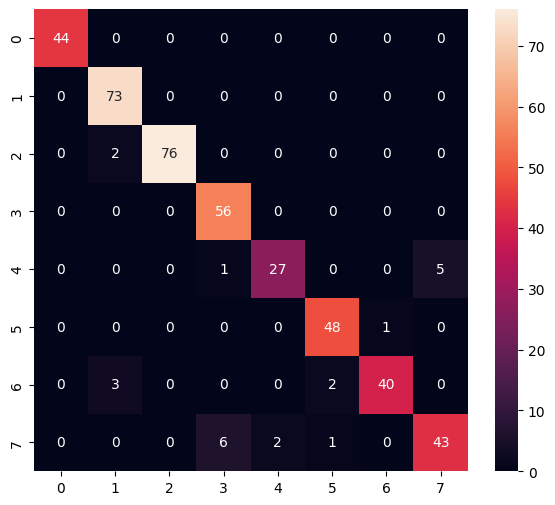

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.94      1.00      0.97        73
           2       1.00      0.97      0.99        78
           3       0.89      1.00      0.94        56
           4       0.93      0.82      0.87        33
           5       0.94      0.98      0.96        49
           6       0.98      0.89      0.93        45
           7       0.90      0.83      0.86        52

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [15]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [16]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmph479dlxy/assets


INFO:tensorflow:Assets written to: /tmp/tmph479dlxy/assets


Saved artifact at '/tmp/tmph479dlxy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  135278320683840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135278320686832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135278185204016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135278185203312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135278185208416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135278185208944: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1752750934.667372    8059 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1752750934.667422    8059 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-07-17 13:15:34.667847: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmph479dlxy
2025-07-17 13:15:34.668549: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-07-17 13:15:34.668564: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmph479dlxy
I0000 00:00:1752750934.672682    8059 mlir_graph_optimization_pass.cc:425] MLIR V1 optimization pass is not enabled
2025-07-17 13:15:34.673436: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-07-17 13:15:34.697018: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmph479dlxy
2025-07-17 13:15:34.704725: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

6732

In [17]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/home/thanhf/thesis_ws/src/cv/.venv/lib/python3.10/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [18]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [19]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [20]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 0 ns, sys: 332 μs, total: 332 μs
Wall time: 851 μs


In [21]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2241457e-03 1.2193480e-02 8.9314973e-01 1.5713670e-03 5.9716653e-02
 2.9070664e-03 2.7732886e-02 5.0461775e-04]
2
